In [479]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [480]:
def scatter(x, y=None):
    if y is None:
        plt.plot(x[:, 0], x[:, 1], 'ko', alpha=0.05)
    else:
        plt.plot(x[y == 0, 0], x[y == 0, 1], 'bo', alpha=0.5)        
        plt.plot(x[y == 1, 0], x[y == 1, 1], 'ro', alpha=0.5)        

In [481]:
def plot_scatter(x, y=None):
    plt.figure(figsize=(6, 6))
    scatter(x, y)
    plt.show()

In [482]:
### Define circle distributions

In [483]:
noise = 0.1
factor = 0.2

### Training data (small)

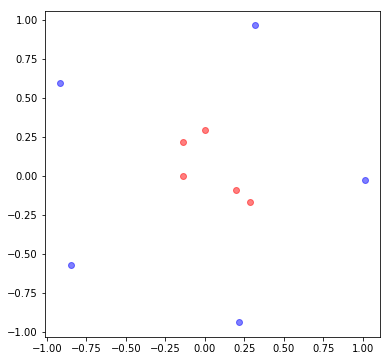

In [484]:
x_train, y_train = make_circles(n_samples=10, noise=noise, factor=factor)
plot_scatter(x_train, y_train)

### Test data

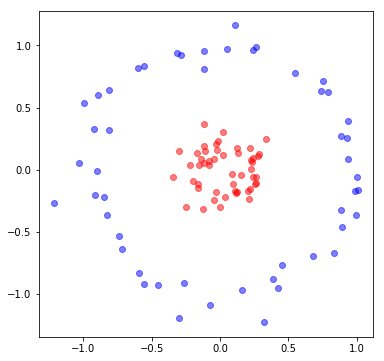

In [485]:
x_test, y_test = make_circles(n_samples=100, noise=noise, factor=factor)
plot_scatter(x_test, y_test)

### Unlabeled data drawn from the same distribution (big)

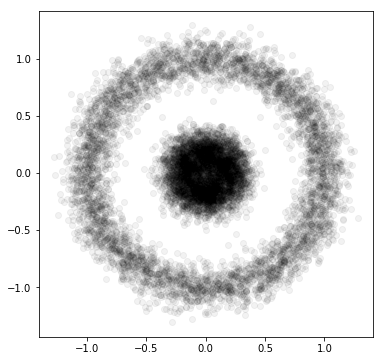

In [486]:
x, _ = make_circles(n_samples=10000, noise=noise, factor=factor)
plot_scatter(x)

### Plot labeled and unlabled data in the same figure

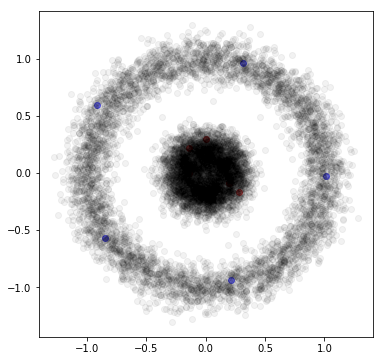

In [487]:
plt.figure(figsize=(6, 6))
scatter(x_train, y_train)
#scatter(x_test, y_test)
scatter(x)
plt.show()

### Build an autoencoder to train latent representation

In [488]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

activation = 'tanh'
input_vector = Input(shape=(2,))
h = Dense(20, activation=activation)(input_vector)
h = Dense(10, activation=activation)(h)
h = Dense(4, activation=activation)(h)
encoded = h

h = Dense(10, activation=activation)(h)
h = Dense(20, activation=activation)(h)
h = Dense(2, activation=activation)(h)

ae = Model(input_vector, h)
ae.summary()

encoded_input = Input(shape=(4,))
decoder = Model(encoded_input, ae.layers[-1](ae.layers[-2](ae.layers[-3](encoded_input))))
encoder = Model(input_vector, encoded)

ae.compile(optimizer='rmsprop', loss='mse')

ae.fit(x, x, batch_size=100, epochs=2, validation_split=0.1)

x_train_latent = encoder.predict(x_train)
x_test_latent = encoder.predict(x_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_71 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_211 (Dense)            (None, 20)                60        
_________________________________________________________________
dense_212 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_213 (Dense)            (None, 4)                 44        
_________________________________________________________________
dense_214 (Dense)            (None, 10)                50        
_________________________________________________________________
dense_215 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_216 (Dense)            (None, 2)                 42        
Total para

### Compare the performance of supervised and semi-supervised learning

In [489]:
from sklearn.ensemble import RandomForestClassifier

c1 = RandomForestClassifier()
c1.fit(x_train, y_train)
s1 = c1.score(x_test, y_test)
print('Supervised learning:      ', s1)

c2 = RandomForestClassifier()
c2.fit(x_train_latent, y_train)
s2 = c2.score(x_test_latent, y_test)
print('Semi-supervised learning: ', s2)

c3 = RandomForestClassifier()
c3.fit(np.hstack((x_train, x_train_latent)), y_train)
s3 = c3.score(np.hstack((x_test, x_test_latent)), y_test)
print('Combined learning:        ', s3)

Supervised learning:       0.82
Semi-supervised learning:  0.92
Combined learning:         0.92
